In [1]:
# Signal Generation by: Peter Mankowski
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Mean spectral noise density =  1.0236626518789311 arb.u/SQRT(Hz)


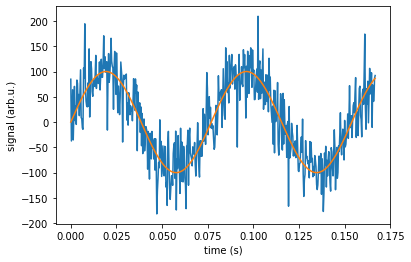

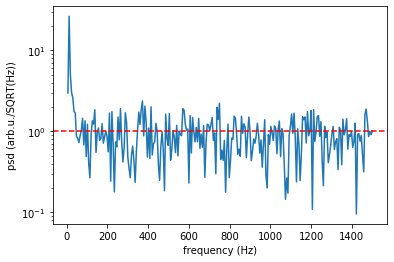

In [5]:
"""
Hooks to the gen.eng.: 
-------------------------------------------------------
spectral_noise_density: unit/SQRT(Hz)
sample_rate:            sample rate
n:                      no of points
mu:                     mean value (optional knob only)
-------------------------------------------------------

Return parameters:
n points of noise signal with spectral noise density
"""
# The profile of your noise to be experimented in here
def white_noise(spectral_noise_density, sr, n, mu=0):
    sigma = spectral_noise_density * np.sqrt(sr/2)
    noise = np.random.normal(mu, sigma, n)
    return noise

spectral_noise_density = 1 # spectral noise density unit
sample_rate = 3000
n = 500
period = n/sample_rate
time = np.linspace(0, period, n)
signal_pure = 100*np.sin(2*np.pi*13*time)
noise = white_noise(spectral_noise_density, sample_rate, n)
signal_with_noise = signal_pure + noise

f, psd = signal.periodogram(signal_with_noise, sample_rate)

print("Mean spectral noise density = ",np.sqrt(np.mean(psd[50:])), "arb.u/SQRT(Hz)")

plt.plot(time, signal_with_noise)
plt.plot(time, signal_pure)
plt.xlabel("time (s)")
plt.ylabel("signal (arb.u.)")
plt.show()

plt.semilogy(f[1:], np.sqrt(psd[1:]))
plt.xlabel("frequency (Hz)")
plt.ylabel("psd (arb.u./SQRT(Hz))")
#plt.axvline(13, ls="dashed", color="g")
plt.axhline(spectral_noise_density, ls="dashed", color="r")
plt.show()